In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
image = cv2.imread('./calibration_data/22.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape



In [12]:
#undistort
mtx = np.array([[305.03412751,   0.,         310.43208301],
 [  0.,         304.92395002, 238.23683725],
 [  0.,           0. ,          1.        ]])
dist = np.array([[-3.08083398e-01,  9.54688600e-02, -3.29954232e-04,  1.76494405e-04,
  -1.30991409e-02]])
opt_mtx = np.array([[217.27056885,   0.,         306.34656044],
 [  0.,         220.71405792, 228.98907581],
 [  0.,           0.,           1.        ]])

image = cv2.undistort(image, mtx, dist, None, opt_mtx)


(240, 640, 3)


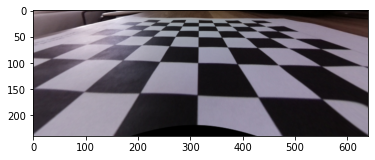

In [13]:

image = image[int(height/2):,:]
# input_width = 640
# input_height = 240
# image = cv2.resize(image, (input_width, input_height))

plt.imshow(image)
print(image.shape)
height, width, _ = image.shape

[[ 2.95270270e+00  3.04864865e+01 -3.04864865e+02]
 [ 0.00000000e+00  2.10810811e+01 -2.10810811e+02]
 [ 6.29913773e-19  4.76351351e-02  1.00000000e+00]]
(390, 1280, 3)


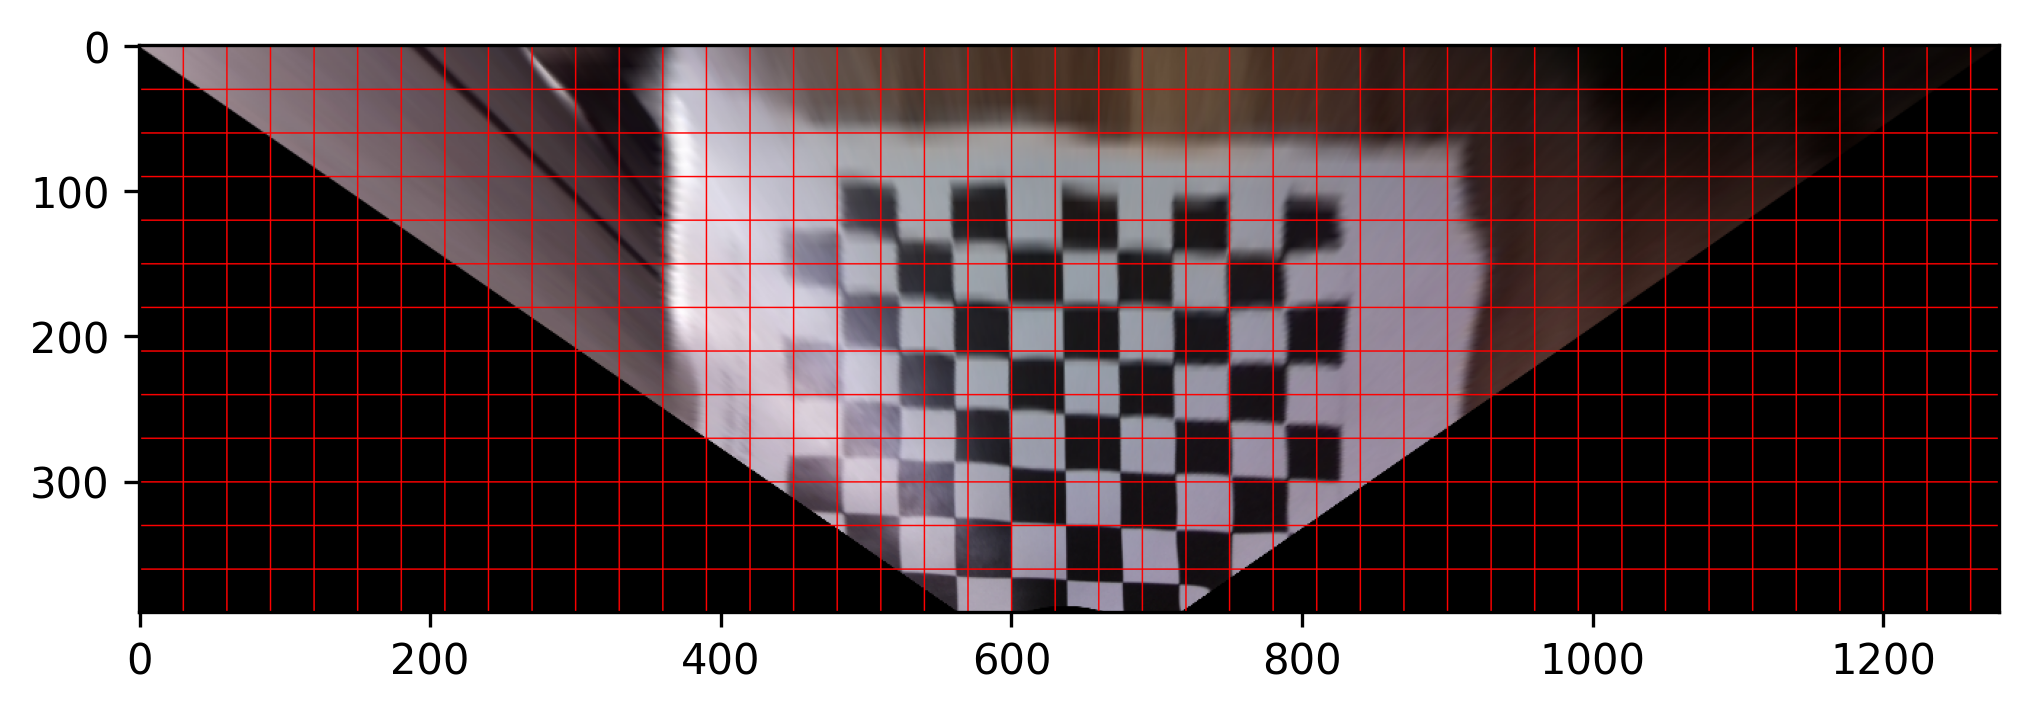

In [59]:

top_offset = 10
stretch  = 76
y_correct = 150
src = np.float32([[0,top_offset], [0,height], [width, height], [width, top_offset]])
l = np.int(width - stretch)
r = np.int(width + stretch)
wh = np.int(width/2)
dst = np.float32([[0,0], [l,height+y_correct], [r,height+y_correct], [width*2, 0]])
H = cv2.getPerspectiveTransform(src, dst)

print(H)
# 630 ppm

out = cv2.warpPerspective(image,H,(width*2, height+y_correct),flags=cv2.INTER_LINEAR)
#Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 30,30

# Custom (rgb) grid color
grid_color = [255,0,0]

# Modify the image to include the grid
out[:,::dy,:] = grid_color
out[::dx,:,:] = grid_color 

print(out.shape)

# Show the result
plt.figure(figsize=(8, 6), dpi=300)
plt.imshow(out)
plt.show()